# PHYS591000 in 2022
# Lab 02
---
## Goal 
In lab 02, we will learn basic idea of classification: 
* Training/Test/Validation samples
* Accuracy
* Confusion matrix 
* Receiver Operating Characteristic Curve (ROC)/  Area Under the Curve (AUC)

In addition, we will learn another popular data fromat: `Pandas Dataframe`.   

---

## Classification

* We will take a top jets v.s QCD jets (same as Week 01) to be the example.

* Then, a function: `train_test_split` in scikit-learn will help you split data into training dataset and test dataset, randomly.

* Linear Discriminant Analysis (LDA) is a method to project high-dimensional surface to 1-dimensional axis.

* It is interesting to visualize your result into 1D histogram.

* We will learn how to interpret our result in accuracy.

* The confusion matrix is a common metric to judge the prediction result. 

* We will follow references to calculate a confusion matrix for our result.

* At last, we will show the performace in ROC and AUC. 

> **Reference**   
> 1. [Train/Test split in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> 2. [Linear Discriminant Analysis in Wiki](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
> 3. [LDA in scikit-learn (function)](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)
> 4. [LDA in scikit-learn (example)](https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py)
> 5. [Confusion Matrix in Wiki](https://en.wikipedia.org/wiki/Confusion_matrix)
> 6. [Confusion Matrix in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
> 7. [Confusion Matrix in Pandas](https://datatofish.com/confusion-matrix-python/)
> 8. [Confusion Matrix tutorial](https://github.com/cartervu/EPE_Stats_Tutorials/blob/main/Confusion_Matrix.ipynb)
> 9. [Receiver Operating Characteristic in Wiki](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
> 10. [Receiver Operating Characteristic in scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
> 11. [Area Under the Curve in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)
> 12. [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-2022-week02/classification/topjet_qcdjet.npz


## Lab 2 
---

### 1.1  
* Load the npz file `/kaggle/input/phys591000-2022-week02/classification/topjet_qcdjet.npz`.   
* Pick up `label`, `jet_pt` and `jet_mass` arrays.  
* The array `label` labels top jet and QCD jet.  
      * [1,0] stands for top jets.   
      * [0,1] stands for QCD jets.  
* Store those features into a `Pandas DataFrame` with column name: `label`, `jet_pt` and `jet_mass`.
      * NOTE: for `label`, please pick up first axis to represent top jets and QCD jets.    
              (1 stands for top jets and 0 stands for QCD jets)

* Please use the *Methods*: *describe* to show your pandas dataFrame.
      (Hint: look up the `Pandas DataFrame` website to see what is *Methods*)

[Ref: Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)   
[Ref: Structure of Pandas DataFrame](https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm)   

In [2]:
##############################################################################
# Code for 1.1
# 
##############################################################################
# Please code in this cell

# load the data
data = np.load('/kaggle/input/phys591000-2022-week02/classification/topjet_qcdjet.npz')

# pick up array
label    = data['label']
jet_pt   = data['jet_pt']
jet_mass = data['jet_mass']
img_pt    = data['img_pt']

# save as pandas
df  = pd.DataFrame(data={'label': label[:,0], 'jet_pt': jet_pt, 'jet_mass':jet_mass})
# create a dataframe 
top_df = df[df.label==1]
qcd_df = df[df.label==0]

df.describe()
##############################################################################

,label,jet_pt,jet_mass
count,5000.000000,5000.000000,5000.000000
mean,0.496000,595.898193,135.121582
std,0.500034,28.676941,56.836155
min,0.000000,550.045349,12.196311
25%,0.000000,570.599777,81.103910
50%,0.000000,593.694275,153.085609
75%,1.000000,619.948242,176.713593
max,1.000000,649.980652,325.338684


---

### 1.2
* Please make 2 correlation tables for top jets and QCD jets, respectively.
    * The correlation table will contains `jet_pt` and `jet_mass`.

[Ref: Correlation in Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)   
[Ref: Visualize Correlation Table](https://datagy.io/python-correlation-matrix/)

In [3]:
##############################################################################
# Code for 1.2
# 
##############################################################################
# Please code in this cell

# drop the colume 'label'
top_df_cor = top_df.drop('label',axis=1)
qcd_df_cor = qcd_df.drop('label',axis=1)

# do correlation
cor_top = top_df_cor.corr()
cor_qcd = qcd_df_cor.corr()

print("correlation of top")
print(cor_top)

print("correlation of qcd")
print(cor_qcd)
##############################################################################

correlation of top
            jet_pt  jet_mass
jet_pt    1.000000  0.073181
jet_mass  0.073181  1.000000
correlation of qcd
            jet_pt  jet_mass
jet_pt    1.000000  0.062311
jet_mass  0.062311  1.000000


---

### 1.3
* Please make a 2D scatter plot for `jet_pt` and `jet_mass`.
    * `jet_pt` is in x-axis, `jet_mass` is in y-axis 
    * top jets in green dot and QCD jets in red dot.

[Ref: matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

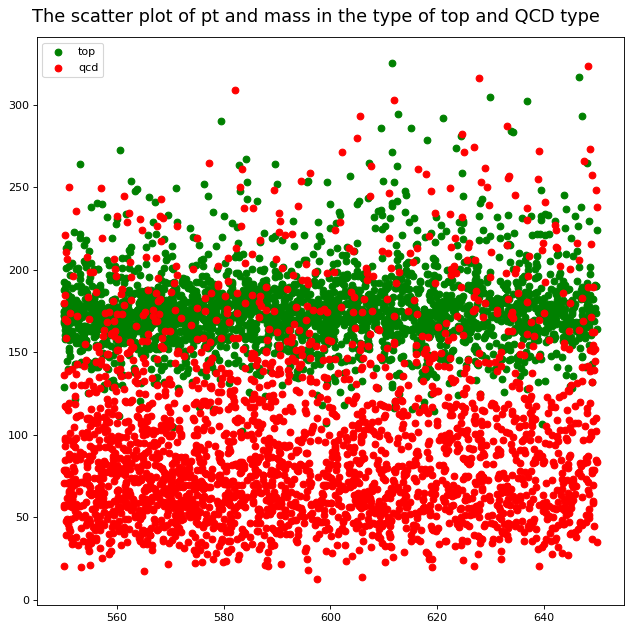

In [4]:
##############################################################################
# Code for 1.3
# 
##############################################################################
# Please code in this cell

# plot the scatter figure of : pt vs mass
fig = plt.figure(figsize=(8,8), dpi=80)
fig.set_tight_layout(True)
fig.suptitle('The scatter plot of pt and mass in the type of top and QCD type', fontsize=16)

plt.scatter(top_df['jet_pt'], top_df['jet_mass'], label='top',color='g')
plt.scatter(qcd_df['jet_pt'], qcd_df['jet_mass'], label='qcd',color='r')
plt.legend()
plt.show()

##############################################################################

---

### 1.4
* Please define `X` as feature set and `Y` as target.
    * feature set contains: `jet_pt`, `jet_mass`
    * target contains: `label`
* Please use scikit-learn function `train_test_split` to split `X` and `Y` into training set and test set. (X_train, X_test, Y_train, Y_test)
    * 90% for the training set and 10% for test set   
    >***NOTE: You should import `train_test_split` by yourself!***   
* Please show how many events in the training set and test set, respectively.
* Please show how many top jets and QCD jets in the training set and test set.
* Please use the *Methods*: *describe* to check `X_train` and `X_test`.

[Ref: Train/Test split in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
##############################################################################
# Code for 1.4
#  
##############################################################################
# Please code in this cell

# import the function:train_test_split
from sklearn.model_selection import train_test_split


# X as feature set and Y as target
X = df.drop('label',axis=1)
Y = df.drop(['jet_pt','jet_mass'],axis=1)

# split X and Y into training set and test set for 10% test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
# beacuse split is random, so the number of train and test will be different always time!

# Check the number of events in training set and test set
print("X_train shape is: ",X_train.shape)
print("Y_train shape is: ",Y_train.shape)
print("The number of training set is: ",Y_train.shape[0])

print("X_test shape is: ",X_test.shape)
print("Y_test shape is: ",Y_test.shape)
print("The number of training set is: ",Y_test.shape[0])


# Check the number of top jets and QCD jets in training set and test set
print("The number of top type of training is: ",X_train[Y_train.label==1].shape[0])
print("The number of top type of test is: ",X_test[Y_test.label==1].shape[0])

print("The number of QCD type of training is: ",X_train[Y_train.label==0].shape[0])
print("The number of QCD type of test is: ",X_test[Y_test.label==0].shape[0])

##############################################################################

X_train shape is:  (4500, 2)
Y_train shape is:  (4500, 1)
The number of training set is:  4500
X_test shape is:  (500, 2)
Y_test shape is:  (500, 1)
The number of training set is:  500
The number of top type of training is:  2231
The number of top type of test is:  249
The number of QCD type of training is:  2269
The number of QCD type of test is:  251


In [6]:
##############################################################################
# Code for 1.4
#  * Please use the *Methods*: *describe* to check `X_train`.
##############################################################################
# Please code in this cell

X_train.describe()

##############################################################################

,jet_pt,jet_mass
count,4500.000000,4500.000000
mean,595.710999,135.165741
std,28.576080,56.765167
min,550.045349,12.196311
25%,570.569427,81.281433
50%,593.616089,153.206253
75%,619.520844,176.713593
max,649.980652,325.338684


In [7]:
##############################################################################
# Code for 1.4
#  * Please use the *Methods*: *describe* to check `X_test`.
##############################################################################
# Please code in this cell

X_test.describe()


##############################################################################

,jet_pt,jet_mass
count,500.000000,500.000000
mean,597.589172,134.725357
std,29.544819,57.527554
min,550.532593,21.292604
25%,570.875992,77.110413
50%,594.693909,150.888397
75%,623.259567,176.667580
max,649.779846,293.289429


---

### 1.5
* Use `jet_pt`, `jet_mass` to train a LDA model by the training dataset to classify top jets and QCD jets into 2 classes
    >***NOTE: You should import `LinearDiscriminantAnalysis` by yourself!*** 
* Apply this model to test dataset.
* Please calcuate and show accuracy.
> Here, accuracy means how many predicted classes equal to truth classes divided total number
    $$ \texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i) $$

* Please calcuate and show the AUC value. 
    * using scikit-learn function `metrics.roc_auc_score` to get AUC values for test dataset.
    >***NOTE: You should import `metrics.roc_auc_score` by yourself!*** 

    > ***NOTE: You may use `.predict_proba(X)`, `.transform(X,Y)` or `.decision_function(X)` to get the AUC. Please decide which one you prefer for the following cells.***



[Ref: LDA in in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)   
[Ref: Accuracy calculation by scratch](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  
[Ref: Accuracy calculation in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  
[Ref: AUC calculation in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=auc#sklearn.metrics.roc_auc_score)   

In [8]:
##############################################################################
#Code for 1.5
# 
##############################################################################
# Please code in this cell

# import the function: LinearDiscriminantAnalysis, accuracy_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# transform dataframe to array, whcih can then let them get into LinearDiscriminantAnalysis
X_train_np = X_train.to_numpy()
Y_train_np = Y_train.to_numpy()
Y_train_np = Y_train_np[:,0]
X_test_np = X_test.to_numpy()
Y_test_np = Y_test.to_numpy()
Y_test_np = Y_test_np[:,0]


# Training w/ LDA from skLearn
clf = LinearDiscriminantAnalysis()
X_train_fit = clf.fit(X_train_np, Y_train_np)
Y_pred = clf.predict(X_test_np)

# accuracy
print('accuracy',accuracy_score(Y_test_np, Y_pred))
print(" ")

# AUC 

Y_pred_tran       = clf.transform(X_test_np)
print('AUC of .transform is :',roc_auc_score(Y_test_np, Y_pred_tran[:,0]))
print("The first five elements :", Y_pred_tran[0:5,0])
print(" ")

Y_pred_dec        = clf.decision_function(X_test_np)
print('AUC of .decision_function is :',roc_auc_score(Y_test_np, Y_pred_dec))
print("The first five elements :", Y_pred_dec[0:5])
print(" ")

Y_pred_prob_test  = clf.predict_proba(X_test_np)[:, 1]
Y_pred_prob_train = clf.predict_proba(X_train_np)[:, 1]
print('AUC of .predict_proba is :',roc_auc_score(Y_test_np, Y_pred_prob_test))
print("The first five elements :" ,Y_pred_prob_test[0:5])
print(" ")

print("We will choose the \"clf.predict_proba\" prediction to continue our exercise!")

##############################################################################

accuracy 0.9
 
AUC of .transform is : 0.9084145346325542
The first five elements : [ 1.37598723 -0.47824595  0.60675222 -1.63879536 -1.08153047]
 
AUC of .decision_function is : 0.9084145346325542
The first five elements : [ 2.755919  -1.0040174  1.1960964 -3.3573318 -2.227333 ]
 
AUC of .predict_proba is : 0.9084145346325542
The first five elements : [0.94024676 0.2681523  0.76782966 0.0336559  0.09732268]
 
We will choose the "clf.predict_proba" prediction to continue our exercise!


---

### 1.6
Discussion for 1.6   
* Please describe why you choose `.predict_proba(X)`, `.fit_transform(X,Y)` or `.decision_function(X)` for the following assignments.
* Is there difference between these three metrics?
---
Please write your discussion in this cell:     






In [9]:
# We choose the .predict_proba(X) to do the following assignments. 

# The 1.5 cell results show the first five elements of each prediction,
# .predict_proba(X) is the function can show the probability of 
# which class does the sample belong to, so it will generate the value between 0 to 1.
# But the other function will get a value with the data point projected to LDA line,
# which value is relatively unnormalized.

# The nornalized prediction can make the strightforward result base on
# whether it's >0.5 can be wiewed as 1, <0.5 can be viewed as 0.
# This is a advantage other methods cann't do.

---

### 1.7
* Please calculate the confusion matrix for the result from 1.5

[Ref: Confusion Matrix in Wiki](https://en.wikipedia.org/wiki/Confusion_matrix)  
[Ref: Confusion Matrix in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[Ref: Confusion Matrix in Pandas](https://datatofish.com/confusion-matrix-python/)  
[Ref: Confusion Matrix tutorial](https://github.com/cartervu/EPE_Stats_Tutorials/blob/main/Confusion_Matrix.ipynb)  

The confusion_matrix is:
Predicted    0    1
Actual             
0          207   44
1            6  243
The normalized confusion_matrix is:
Predicted      0      1
Actual                 
0          0.414  0.088
1          0.012  0.486


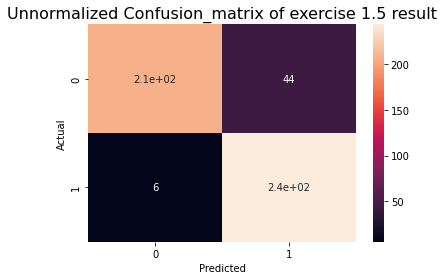

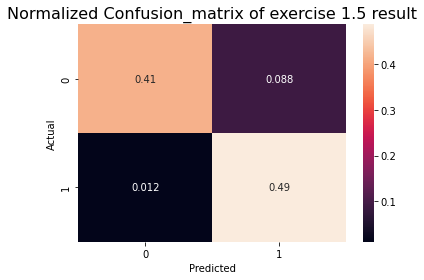

In [10]:
##############################################################################
#Code for 1.7
# 
##############################################################################
from sklearn.metrics import confusion_matrix
import seaborn as sn

# save a dataframe of test and predict
data = {'Y_test_np': Y_test_np, 'Y_pred': Y_pred }
df = pd.DataFrame(data, columns=['Y_test_np','Y_pred'])

# create a confusion matrix
confusion_matrix0 = pd.crosstab(df['Y_test_np'], df['Y_pred'], rownames=['Actual'], colnames=['Predicted'], normalize=True)
confusion_matrix1 = pd.crosstab(df['Y_test_np'], df['Y_pred'], rownames=['Actual'], colnames=['Predicted'])
print("The confusion_matrix is:")
print(confusion_matrix1)

print("The normalized confusion_matrix is:")
print(confusion_matrix0)

# plot !!!
sn.heatmap(confusion_matrix1, annot=True)
plt.title("Unnormalized Confusion_matrix of exercise 1.5 result", fontsize=16)
plt.show()

sn.heatmap(confusion_matrix0, annot=True)
plt.title("Normalized Confusion_matrix of exercise 1.5 result", fontsize=16)
plt.show()

##############################################################################

---

### 1.8
* Please project these 2 features into 1-dimensional LDA prediction score and make a histogram.
    * You should use the prediction from (1.5)
    * You will split prediction into two classes: truth top jet and truth QCD jets
    * truth top jets in bule and truth QCD jets in red

* please let total area of each curve be one(histogram in density mode) .

**Example:**   
   > In this example figure, the class probability is treated as score.    

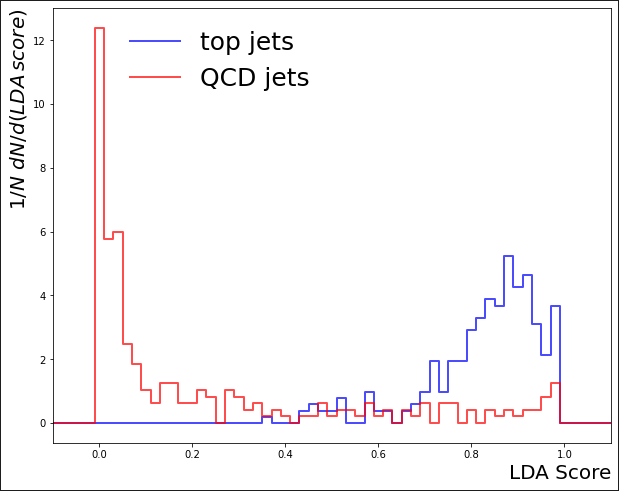



[Ref: pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)    
[Ref: pandas.DataFrame.plot.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)    
[Ref: Pandas Histogram Example](https://dataindependent.com/pandas/pandas-histogram-dataframe-hist/)    

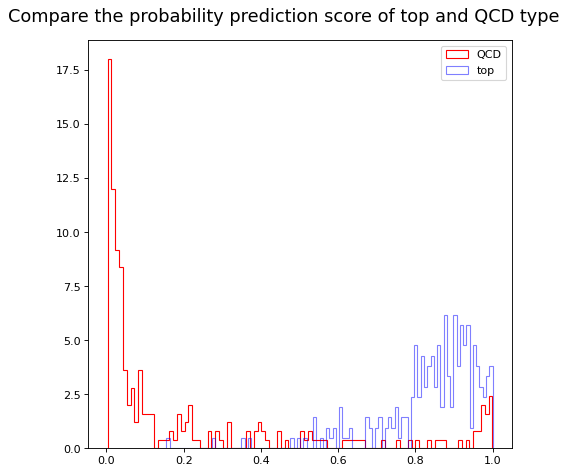

In [11]:
#############################################################################
#Code for 1.8
# 
##############################################################################
# Please code in this cell

# Please project these 2 features into 1-dimensional LDA prediction score and make a histogram.


# Plotting LDA results
fig = plt.figure(figsize=(6,6), dpi=80)
fig.set_tight_layout(True)
fig.suptitle('Compare the probability prediction score of top and QCD type', fontsize=16)

plt.hist(Y_pred_prob_test[Y_test_np==0], bins=100, histtype='step', color='r',label='QCD', density=True)
plt.hist(Y_pred_prob_test[Y_test_np==1], bins=100, histtype='step', color='b',label='top', density=True, alpha=0.5)
plt.legend()
plt.show()

##############################################################################

---

### 1.9
* Please generate ROC cursves for training and test dataset.
    * `FPR` is in x-axis, `TPR` is in y-axis
    * Cure for training dataset is blue and test dataset is red.
    * you will use scikit-learn function `metrics.roc_curve`
    >***NOTE: You should import `metrics.roc_curve` by yourself!*** 


[Ref: Receiver Operating Characteristic in Wiki](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)   
[Ref: Receiver Operating Characteristic in scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)   
[Ref: ROC example in scikit-learn  I](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)    
[Ref: ROC example in scikit-learn II](https://scikit-learn.org/0.15/auto_examples/plot_roc.html)

AUC of test data is: 0.9084145346325542
AUC of train data is: 0.9067145331252263


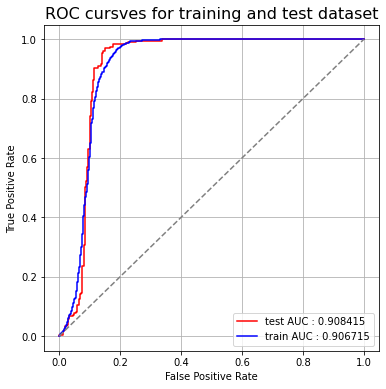

In [12]:
#############################################################################
#Code for 1.9
# 
##############################################################################
# Please code in this cell

# Calculate the "test" data ROC and get AUC
fpr_test, tpr_test, thr = roc_curve(Y_test_np, Y_pred_prob_test, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)
print('AUC of test data is:',roc_auc_test)

# Calculate the "train" data ROC and get AUC
fpr_train, tpr_train, thr = roc_curve(Y_train_np, Y_pred_prob_train, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
print('AUC of train data is:',roc_auc_train)


# plot!!!
plt.figure(figsize=(6,6))
plt.title('ROC cursves for training and test dataset', fontsize=16)
plt.plot(fpr_test,tpr_test, color='r',label = 'test AUC : %f' %roc_auc_test)
plt.plot(fpr_train,tpr_train, color='b',label = 'train AUC : %f' %roc_auc_train)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()

##############################################################################

---

### 1.10
* Try to use features which you invented in the week01 to be the input for LDA.
* Show the perfromance in AUC and ROC.

AUC of predict_proba is : 0.9286858974358974
AUC of test data is: 0.9286858974358974
AUC of train data is: 0.9189252410305042


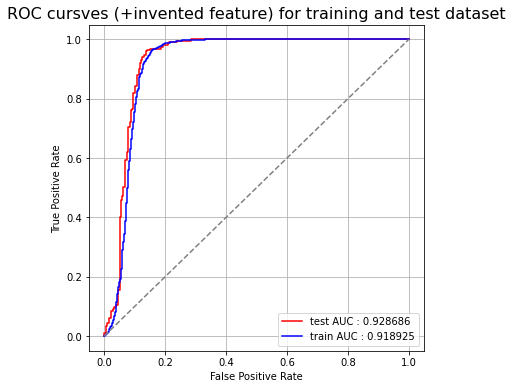

In [13]:
#############################################################################
#Code for 1.10
# 
##############################################################################
# Please code in this cell

# feature: The number of non-zero pixels of img_pt
count = np.zeros(len(img_pt[:,0,0]))
for i in range(len(img_pt[:,0,0])):
    count[i] = len(img_pt[i][np.where(img_pt[i]!=0)])

# create a dataframe 
df  = pd.DataFrame(data={'label': label[:,0], 'jet_pt': jet_pt, 'jet_mass':jet_mass, 'fea': count})
X = df.drop('label',axis=1)
Y = df.drop(['jet_pt','jet_mass','fea'],axis=1)

# split the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train_np = X_train.to_numpy()
Y_train_np = Y_train.to_numpy()
Y_train_np = Y_train_np[:,0]
X_test_np = X_test.to_numpy()
Y_test_np = Y_test.to_numpy()
Y_test_np = Y_test_np[:,0]

# trainning and test the data
clf = LinearDiscriminantAnalysis()
X_train_fit = clf.fit(X_train_np, Y_train_np)
Y_pred_prob_test  = clf.predict_proba(X_test_np)[:, 1]
Y_pred_prob_train  = clf.predict_proba(X_train_np)[:, 1]
print('AUC of predict_proba is :',roc_auc_score(Y_test_np, Y_pred_prob_test))


# Calculate the "test" data ROC and get AUC
fpr_test, tpr_test, thr = roc_curve(Y_test_np, Y_pred_prob_test, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)
print('AUC of test data is:',roc_auc_test)

# Calculate the "train" data ROC and get AUC
fpr_train, tpr_train, thr = roc_curve(Y_train_np, Y_pred_prob_train, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
print('AUC of train data is:',roc_auc_train)

# plot!!!
plt.figure(figsize=(6,6))
plt.title('ROC cursves (+invented feature) for training and test dataset', fontsize=16)
plt.plot(fpr_test,tpr_test, color='r',label = 'test AUC : %f' %roc_auc_test)
plt.plot(fpr_train,tpr_train, color='b',label = 'train AUC : %f' %roc_auc_train)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()

##############################################################################

### 1.11
Discussion for 1.11
* Please describe when you add your new feature to LDA, how does the performance change.
    * please give an explanation if it goes better, worse or the same. 
---
Please write your discussion in this cell:     






In [14]:
# Compare 1.9 and 1.10, the trainning AUC value is slightly increased(~0.01),
# and the test AUC value is float after we try serval times.
# (Because the model is float in each execution due to
# given different trainning data, so the AUC value is also float)

# Hence, we consider that the feature in 1.10 we choose to join 
# trainning data can slightly improve the separational ability.

---